# 4.데이터프레임 집계

- 상세 데이터가 아닌 집계된 데이터에 대한 분석을 자주 요구하니 익숙해져야 할 내용입니다.
- sum(), mean(), max(), min(), count() 메소드를 사용해 지정한 열 또는 열들을 기준으로 집계합니다.
- 평균을 구하는 메소드가 avg()가 아닌 mean() 임을 주의하기 바랍니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips.csv'
tip = pd.read_csv(path)  

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- 우선 집계에 대하여 다음과 같이 정리해 볼 수 있습니다.

<img src='https://raw.githubusercontent.com/jangrae/img/master/groupby.png' width=500 align="left"/>

- **연속값**, **범주값**이라는 용어에 익숙해 지길 바랍니다.
- 대부분은 범주값을 기준으로 연속값의 합, 평균 등을 집계합니다.
- 가끔은 범주값의 개수나 최빈값을 집계하기도 합니다.
- 집계 결과에 대한 시각화를 통해 더 나은 통찰력을 얻게 합니다.

## 4.1.합 구하기

### 4.1.1.열 하나 집계

- 우선 특정 열의 값 합은 다음과 같이 구할 수 있습니다.

In [3]:
# total_bill 합계
tip['total_bill'].sum()

4827.77

In [5]:
# total_bill, tip 각각의 합계
tip[['total_bill','tip']].sum()

total_bill    4827.77
tip            731.58
dtype: float64

**1) 집계하기**

- 만일 day 별로 합을 구하고자 한다면 다음과 같이 합니다.
- 아래 결과 값 네 개를 더하면 전체 합이 됩니다.
- **as_index=True**를 설정(기본값)하면 집계 기준이 되는 열이 인덱스 열이 됩니다.
- 집계 결과가 tip 열만 가지니 시리즈가 됩니다.

# 무조건 index = false 로하고 뒤에오는 리스트는 [[]] 괄호 두 개로 쓰자
# 즉 집계 대상 열,컬럼이 하나가

In [21]:
# day별 tip 합계 --> 시리즈
tip.groupby(by = 'day', as_index = False)[['tip']].sum()

,day,tip
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83


- **[['tip']].sum()**과 같이 하면 열이 여럿이라는 의미여서 결과가 **데이터프레임**이 됩니다.

In [29]:
# day별 tip 합계 --> 데이터프레임
tip['tip'].sum() #첫번째...

tip.groupby('day', as_index = True)[['tip']].sum()

,tip
day,
Fri,51.96
Sat,260.40
Sun,247.39
Thur,171.83


- **as_index=False**를 설정하면 행 번호를 기반으로 한 정수 값이 인덱스로 설정됩니다.

In [32]:
# day별 tip 합계 --> 데이터프레임

tip.groupby('day', as_index = False)[['tip']].sum()

,day,tip
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83


**2) 데이터프레임으로 선언**

- 집계 결과를 새로운 데이터프레임으로 선언하여 사용하는 경우가 많습니다.
- 집계된 결과를 반복해서 사용하거나, 분석 대상이 되는 경우 데이터프레임으로 선언함이 유익합니다.

In [108]:
# day별 tip 합계 조회
tip_sum = tip.groupby('day', as_index = False )[['tip']].sum()

# 확인
tip_sum


,day,tip
0,Fri,51.96
1,Sat,260.40
2,Sun,247.39
3,Thur,171.83


# 중요 !! 집계를 했으면 변수로 지정하자!!!!

**3) 집계 결과 시각화**

- 위 과정으로 집계한 결과를 막대그래프로 간단히 시각화 해봅니다.
- matplotlib 패키지의 pyplot을 plt 별칭을 주어 불러와 시각화에 사용합니다.

In [106]:
# 판다스 제공 시각화
#tip_sum.plot(kind = 'bar')

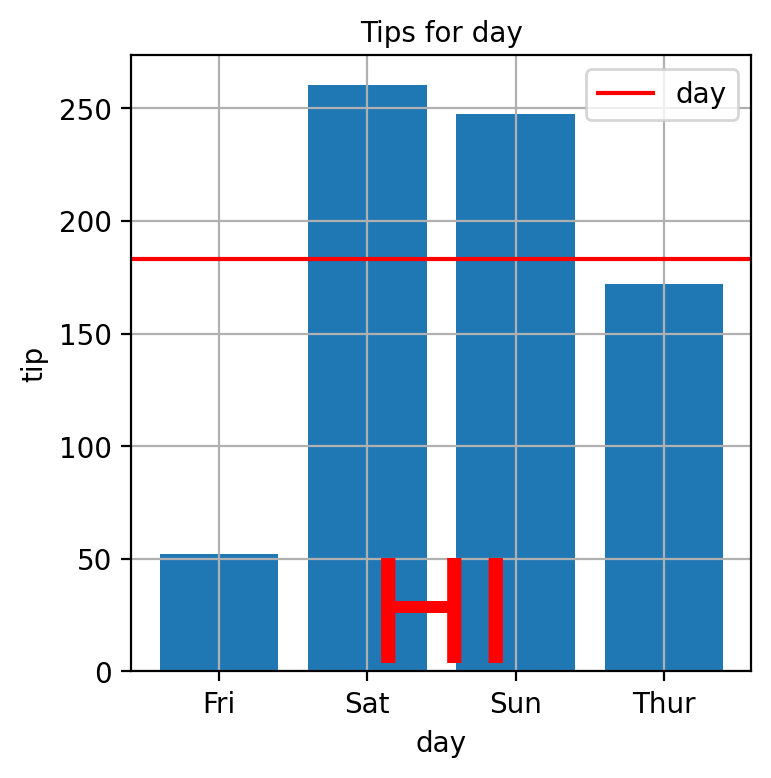

In [121]:
# 라이브러리 불러오기

tip_mean = tip_sum['tip'].mean()
import matplotlib.pyplot as plt


# day 별 tip 비교 시각화
%config InlineBackend.figure_format= 'retina'  # 글자 선명하게

plt.figure(figsize=(4,4))                      # 차트 size 설정

plt.bar(tip_sum['day'],  tip_sum['tip'] )      # 차트 종류와 축 설정
#        x 축              y축

plt.title('Tips for day', size = 10 , pad = 5) # 차트 이름

plt.xlabel('day')                              # x축 이름

plt.ylabel('tip')                              # y축 이름

plt.grid (axis = 'both' )                      # 격자선?? x, y, both 인자 ,,,

plt.axhline(tip_mean, color = 'r')             # 평균 선 ??? 기준선?

plt.legend(['day'])                            # 범례

plt.text(1, 4, 'HI', color  = 'r', size = 52)  # 텍스트 쓰기

plt.show()                                     # 마무리..(제목 안 나오게)

- plt.bar() 대신 plt.barh() 함수를 사용해 가로 막대그래프를 표시할 수 있습니다.

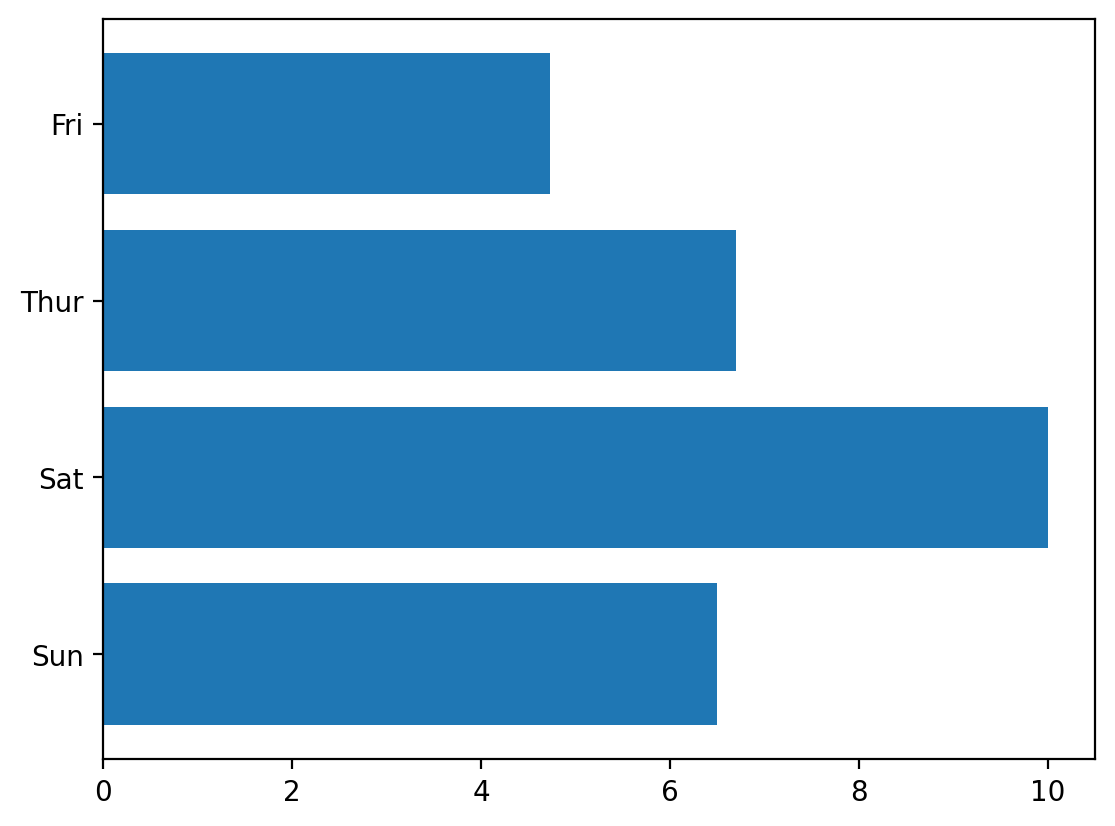

In [61]:
# day 별 tip 비교 시각화

plt.barh( tip['day'], tip['tip'])
plt.show()

**4) 참고: 선 그래프**

- 연속형 값의 변화 추이를 볼 때 선 그래프가 유용합니다.

In [70]:
tip_mean = tip['tip'].mean()
tip_mean

2.9982786885245902

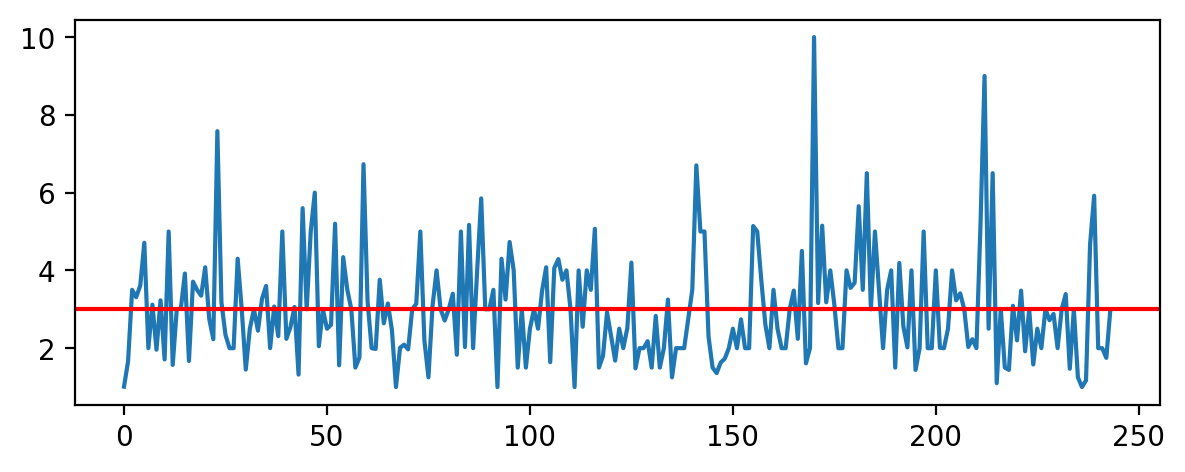

In [72]:
# tip 변경 추이 시각화
plt.figure(figsize=(7,2.5))
plt.plot(tip['tip'])
plt.axhline(tip_mean, color = 'r') # 평균 선 
plt.show()

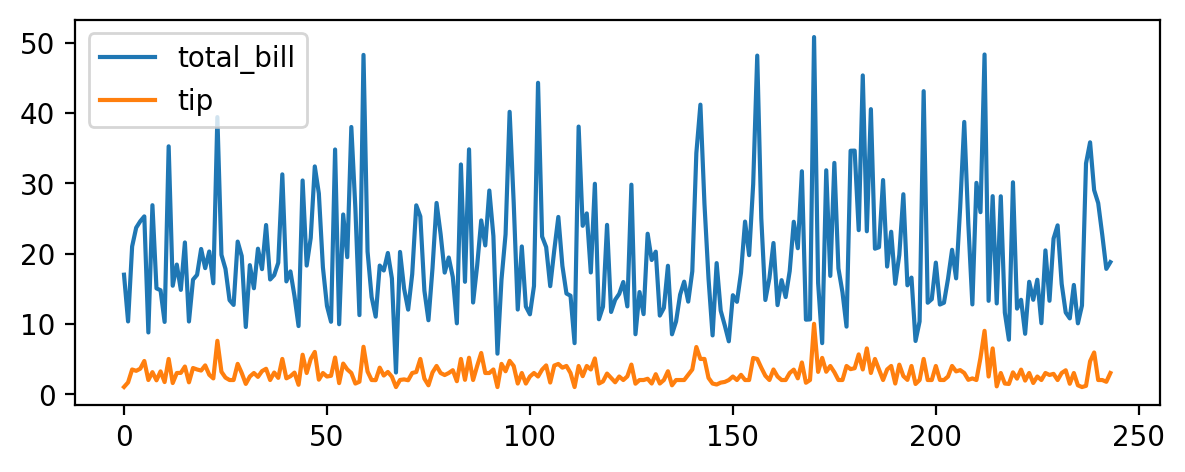

In [78]:
# tip, total_bill 변경 추이 시각화
plt.figure(figsize=(7,2.5))

plt.plot(tip[['total_bill','tip']])

plt.legend([ 'total_bill', 'tip' ])

# plt.grid (axis = 'both' ) # x, y, both 인자

plt.show()

**5) 참고: 히스토그램**

- 연속형 값의 분포를 볼 때는 히스토그램이 유용합니다.

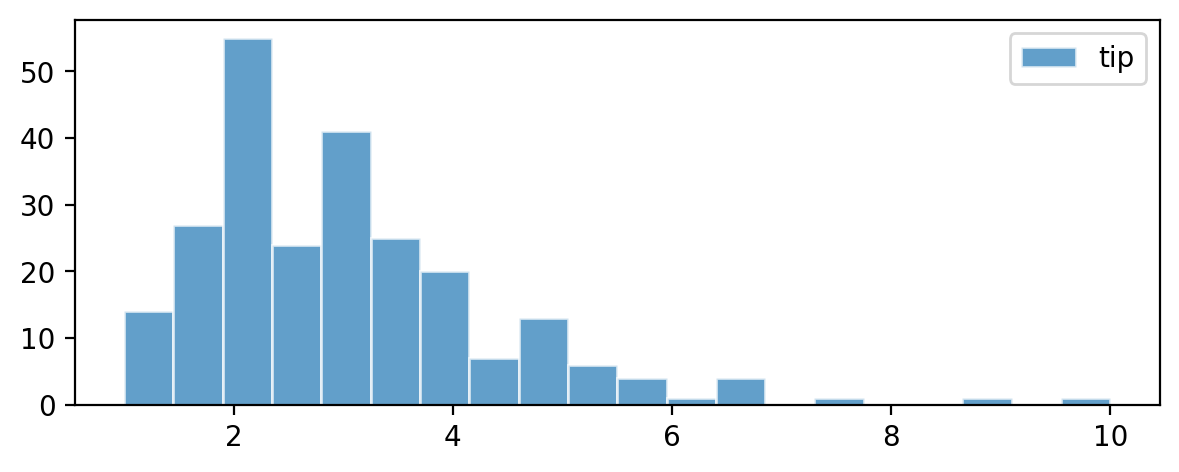

In [109]:
# tip 분포 시각화

plt.figure(figsize=(7,2.5))   # bins?? 울타리? 간격?

plt.hist(tip[['tip']],bins = 20, alpha = 0.7, edgecolor = 'w') # alpha 투명도

plt.legend([ 'tip' ])

# plt.grid (axis = 'both' ) # x, y, both 인자

plt.show()

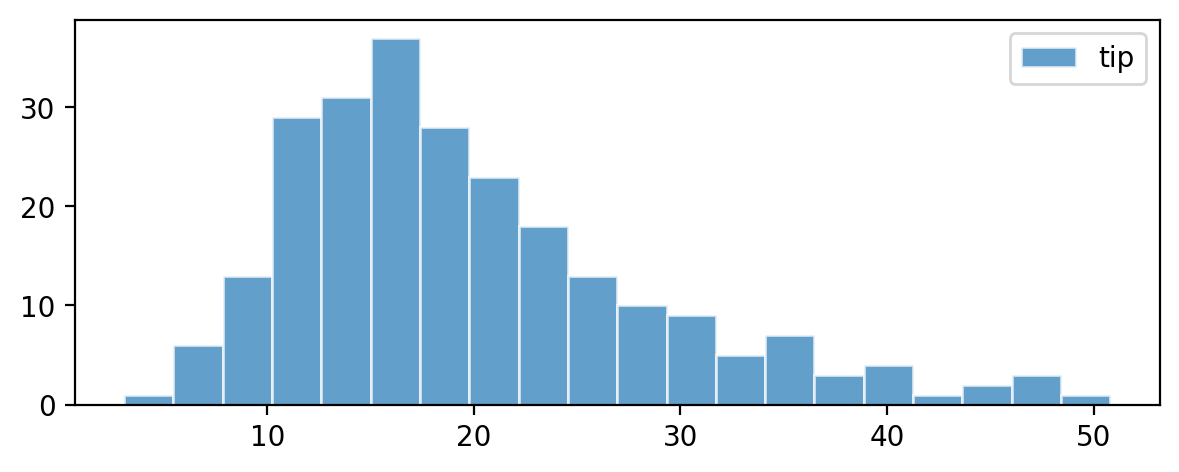

In [84]:
# total_bill 분포 시각화

plt.figure(figsize=(7,2.5))   # bins?? 울타리? 간격?

plt.hist(tip[['total_bill']],bins = 20, alpha = 0.7, edgecolor = 'w') # alpha 투명도

plt.legend([ 'tip' ])

# plt.grid (axis = 'both' ) # x, y, both 인자

plt.show()

### 4.1.2.여러 열 집계

- 여러 열에 대한 집계를 같이 할 수 있습니다.
- **[ ['total_bill', 'tip'] ].sum()** 형태와 같이 집계 대상 열을 리스트로 지정합니다.

In [88]:
# day별 total_bill, tip 합계 조회
ts = tip.groupby(by = 'day', as_index=False)[['total_bill','tip' ]].sum()
                                              # 조회 대상 열
# 확인
ts

,day,total_bill,tip
0,Fri,325.88,51.96
1,Sat,1778.40,260.40
2,Sun,1627.16,247.39
3,Thur,1096.33,171.83


- sum() 메소드 앞에 아무 열도 지정하지 않으면 **기준열 이외의 모든 열에 대한 집계**가 수행됩니다.

In [89]:
# day별 나머지 열들 합계 조회
tip_sum = ts = tip.groupby(by = 'day', as_index=False).sum()


# 확인
tip_sum

,day,total_bill,tip,size
0,Fri,325.88,51.96,40
1,Sat,1778.40,260.40,219
2,Sun,1627.16,247.39,216
3,Thur,1096.33,171.83,152


- **by=['day', 'smoker']** 과 같이 집계 기준 열을 여럿 설정할 수도 있습니다.

# 범주형 데이터만!

In [93]:
# day + smoker별 나머지 열들 합계 조회
tip_sum = ts = tip.groupby(by = ['day','smoker'], as_index=False)[['total_bill','day']].sum()

# 확인
tip_sum

,day,smoker,total_bill
0,Fri,No,73.68
1,Fri,Yes,252.20
2,Sat,No,884.78
3,Sat,Yes,893.62
4,Sun,No,1168.88
5,Sun,Yes,458.28
6,Thur,No,770.09
7,Thur,Yes,326.24


## 4.2.평균, 최댓값, 최솟값, 개수 구하기

- 위와 동일한 방법으로 평균, 최댓값, 최솟값, 개수를 집계할 수 있습니다.
- sum() 메소드 대신 관련된 메소드만 적절히 지정하면 됩니다. 

**1) 평균 구하기**

In [94]:
# day별 tip 평균
tip_mean = tip.groupby(by = 'day', as_index=False)[['tip']].mean()

# 확인
tip_mean

,day,tip
0,Fri,2.734737
1,Sat,2.993103
2,Sun,3.255132
3,Thur,2.771452


In [95]:
# day + sex 별 나머지 모든 열 평균
tip_mean =  tip.groupby(by = ['day','sex'], as_index=False).mean()

# 확인
tip_mean

,day,sex,total_bill,tip,size
0,Fri,Female,14.145556,2.781111,2.111111
1,Fri,Male,19.857000,2.693000,2.100000
2,Sat,Female,19.680357,2.801786,2.250000
3,Sat,Male,20.802542,3.083898,2.644068
4,Sun,Female,19.872222,3.367222,2.944444
5,Sun,Male,21.887241,3.220345,2.810345
6,Thur,Female,16.715312,2.575625,2.468750
7,Thur,Male,18.714667,2.980333,2.433333


**2) 최댓값, 최솟값, 개수 구하기**


In [96]:
# day별 tip 최댓값
tip_max = tip.groupby(by = 'day',as_index=False)[['tip']].max()

# 확인
tip_max

,day,tip
0,Fri,4.73
1,Sat,10.00
2,Sun,6.50
3,Thur,6.70


In [101]:
# day별 tip 최솟값
tip_min = tip.groupby(by = 'day', as_index=False)['tip'].min()

# 확인
tip_min

,day,tip
0,Fri,1.00
1,Sat,1.00
2,Sun,1.01
3,Thur,1.25
